In [6]:
import sys
import os
import numpy as np
import math
from scipy import spatial
import random
from random import randrange
from scipy.stats import powerlaw
from scipy import stats
import csv
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

In [7]:
n = 8
dim = 3**n

In [8]:
def in_carpet(x, y):
    while True:
        if x == 0 or y == 0:
            return True
        elif x % 3 == 1 and y % 3 == 1:
            return False

        x /= 3
        y /= 3

def carpet(n):
    for i in xrange(dim):
        for j in xrange(dim):
            if in_carpet(i, j):
                print '*',
            else:
                print ' ',
        print

In [9]:
x = np.ones((dim,dim))

In [10]:
for i in xrange(dim):
    for j in xrange(dim):
        if not in_carpet(i, j):
            x[i,j] = 0

In [11]:
edgelist = dict()
dist = dict()

#f_out = open("sierpinsky.txt","w")

distances = dict()

output_map = defaultdict(list)




def truncated_power_law(a, m):
    x = np.arange(1, m+1, dtype='float')
    ## Why alpha - 1
    pmf = 1/x**(a-1)
    pmf /= pmf.sum()
    return stats.rv_discrete(values=(range(1, m+1), pmf))

for net in range(600):
    if net%10==0:
        print net
    si = random.sample(range(dim),1)[0]
    sj = random.sample(range(dim),1)[0]
    while x[si,sj] < 1:
        si = random.sample(range(dim),1)[0]
        sj = random.sample(range(dim),1)[0]
    ti = random.sample(range(dim),1)[0]
    tj = random.sample(range(dim),1)[0]

    while x[ti,tj] < 1:
        ti = random.sample(range(dim),1)[0]
        tj = random.sample(range(dim),1)[0]
    #print "source si-sj", si, sj
    #print "target ti-tj", ti ,tj
    for q1 in np.arange(1.65, 1.95, step = 0.005):
        #print "##### current q1", q1
        #print "source si-sj", si, sj
        #print "target ti-tj", ti ,tj
        last_nodes = [None]*2
        recur = 0

        cstm = truncated_power_law(q1,dim-2)
        l = 0
        current = str(si)+"-"+str(sj)
        #print "current source",current
        while (current != str(ti)+"-"+str(tj) and l <= dim**2):
            d_min = dim*2
            edgelist = dict()
            edgelist[current] = []
            ii = int(current.split("-")[0])
            ij = int(current.split("-")[1])
            if ii < dim-1:
                if x[ii+1, ij] > 0:
                    edgelist[str(ii)+"-"+str(ij)].append(str(ii+1)+"-"+str(ij))
            if ij < dim-1:
                if x[ii, ij+1] > 0:
                    edgelist[str(ii)+"-"+str(ij)].append(str(ii)+"-"+str(ij+1))
            if ii > 0:
                if [ii-1, ij] > 0:
                    edgelist[str(ii)+"-"+str(ij)].append(str(ii-1)+"-"+str(ij))
            if ij > 0:
                if [ii, ij-1] >0:
                    edgelist[str(ii)+"-"+str(ij)].append(str(ii)+"-"+str(ij-1))
            #print edgelist

            #print "edgelist without shortcut",edgelist
            no_shortcuts = 1
            ## What is d_max ??
            d_max = 1
            shortcut_found = False
            while not shortcut_found:
                for shortcuts in range(no_shortcuts):
                    r_sample = cstm.rvs()
                    #print "r_sample", r_sample
                    if (math.floor(r_sample*d_max) > 1):
                        k = random.sample(range(int(math.floor(r_sample*d_max))),1)[0]
                        #print "k", k
                        k1 = k
                        k2 = math.floor(r_sample*d_max) - k1
                        #print "k1, k2", k1, k2
                        ni = []
                        nj = []
                    if (ii + k1 <= dim-1) and (ij + k2 <= dim-1):
                        if x[ii + k1,ij + k2] > 0:
                            ni.append(ii + k1)
                            nj.append(ij + k2)
                    if (ii + k1 <= dim-1) and (ij - k2 >= 0):
                        if x[ii + k1,ij - k2] > 0:
                            ni.append(ii + k1)
                            nj.append(ij - k2)
                    if (ii - k1 >= 0) and (ij + k2 <= dim-1):
                        if x[ii - k1,ij + k2] > 0:
                            ni.append(ii - k1)
                            nj.append(ij + k2)
                    if (ii - k1 >= 0) and (ij - k2 >= 0):
                        if x[ii - k1,ij - k2] > 0:
                            ni.append(ii - k1)
                            nj.append(ij - k2)
                    #print "ni-nj" ,ni , nj
                    if ni != []:
                        k = random.sample(range(len(ni)),1)[0]
                        edgelist[current].append(str(int(ni[k]))+"-"+str(int(nj[k])))
                        shortcut_found = True
            #print "with shortcut", edgelist
            for p in edgelist[current]:
                pi = p.split("-")[0]
                pj = p.split("-")[1]
                if spatial.distance.cityblock(np.array([ti,tj]),np.array([int(pi),int(pj)])) < d_min:
                    d_min = spatial.distance.cityblock(np.array([ti,tj]),np.array([int(pi),int(pj)]))
                    tempi = pi
                    tempj = pj
            current = tempi.rstrip()+"-"+tempj.rstrip()


            #print "next node is", current
            l += 1 
            #print "current l", l
        #print "final l", l
        #print >> f_out, q1, l, si, sj, ti, tj
        output_map[q1].append(l)

#f_out.close()

0


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:85: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:89: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:93: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:97: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590


In [ ]:
x[22,10]

In [ ]:
len(np.arange(1.3, 2.5, step = 0.05))

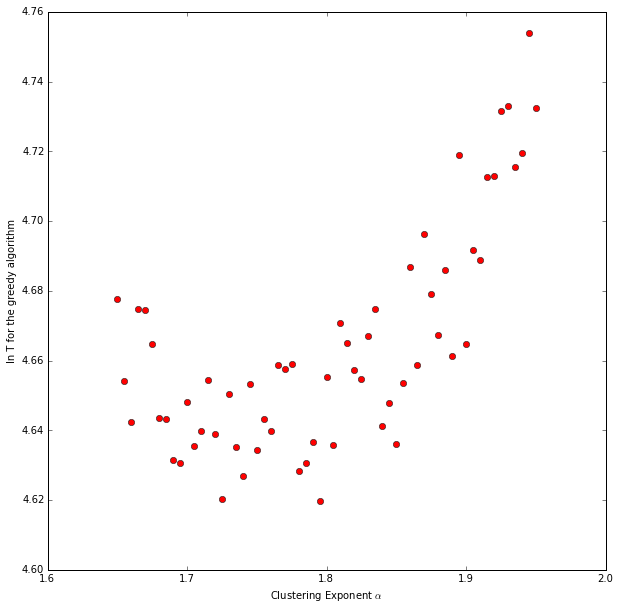

In [12]:
output_for_plot = {n: sum(output_map[n])/float(len(output_map[n])) for n in output_map.keys()}
plt.figure(figsize=(10,10))
plt.plot(output_for_plot.keys(), np.log(output_for_plot.values()), 'ro')
plt.title("")
plt.ylabel("ln T for the greedy algorithm")
plt.xlabel(r"Clustering Exponent $\alpha$")
plt.xticks(np.arange(1.6, 2.1, step = 0.1))
plt.show()

In [ ]:
with open('sierpinsky'+str(dim)+'.csv', 'wb') as f:
    writer = csv.writer(f, delimiter = ' ')
    for pair in  zip(*np.where(x == 1)):
        writer.writerow(pair)
f.close()